In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('combined_data.csv').drop(columns=['Dividends','Stock Splits'])
df['Date']=pd.to_datetime(df['Date'])
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-02,127.0,133.0,127.0,132.0,76.526367,420128


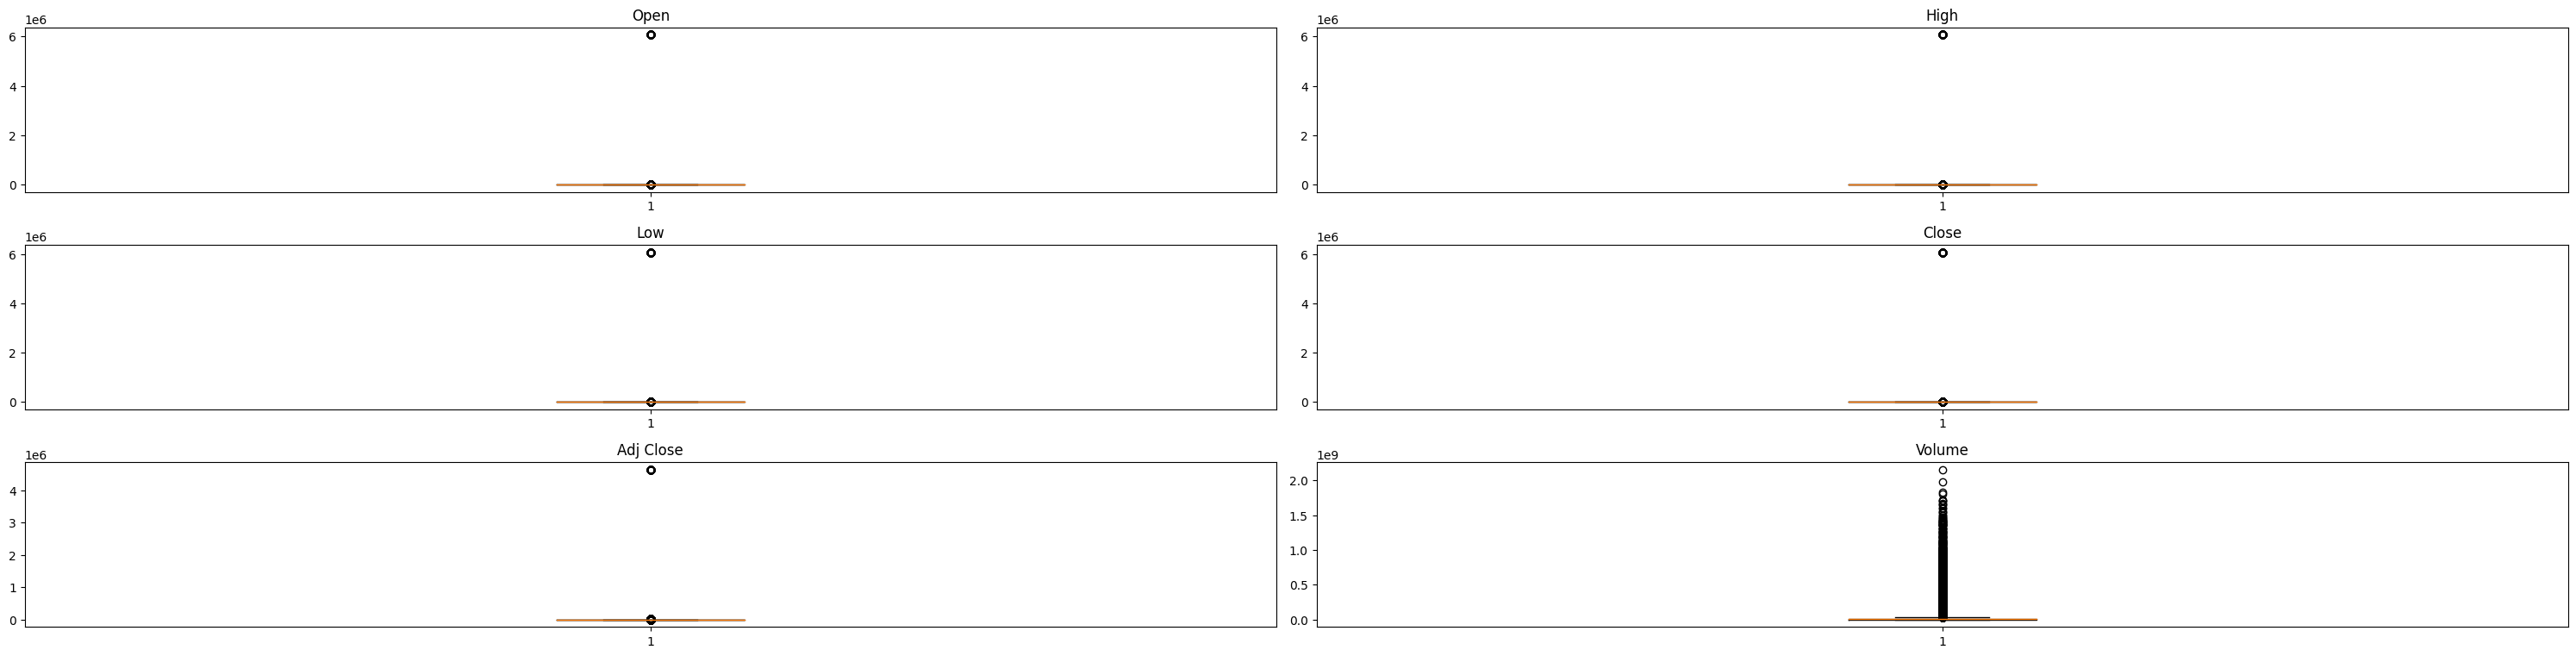

In [46]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2 

fig = plt.figure(figsize=(30, 10))  

for idx, col in enumerate(df.drop(columns=['Date']).columns):
    row = idx // 2
    col_num = idx % 2

    ax = plt.subplot2grid((num_rows, 2), (row, col_num))
    ax.boxplot(df[col])
    ax.set_title(col)

for i in range(num_columns, num_rows * 2):
    fig.delaxes(plt.subplot2grid((num_rows, 2), (i // 2, i % 2)))

plt.tight_layout()
plt.show()

In [47]:
def fix_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
    
for column in df.drop(columns=['Date']).columns:
    fix_outliers_iqr(df, column)


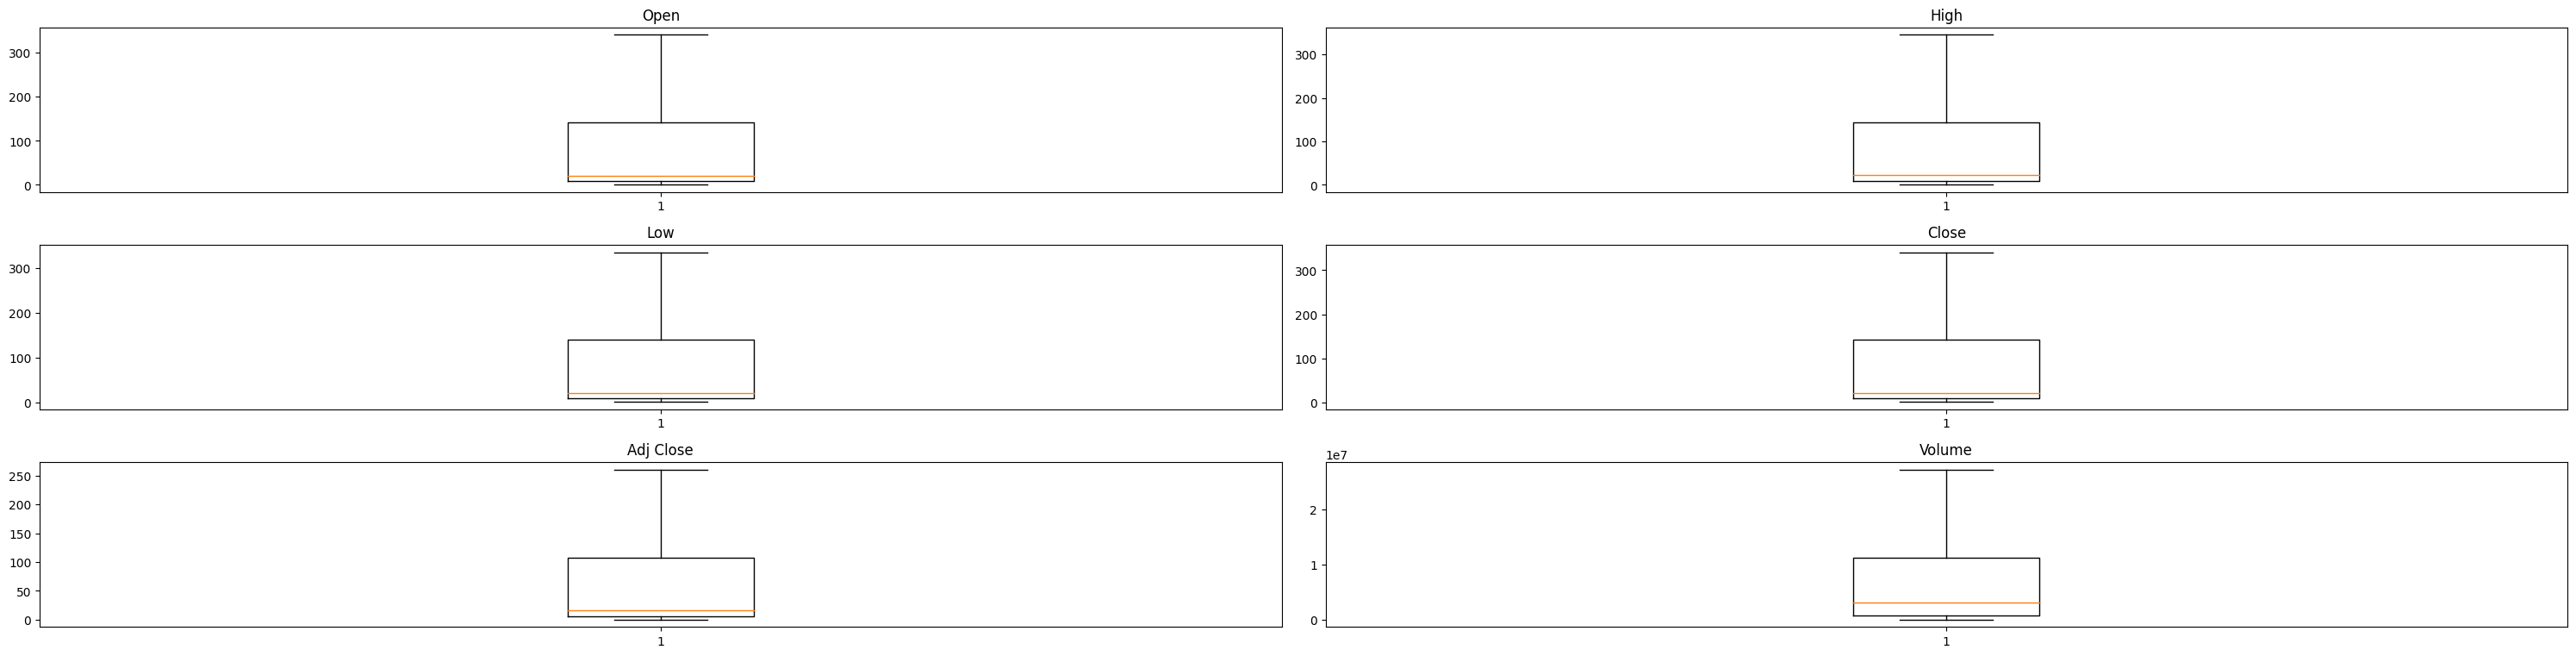

In [48]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2 

fig = plt.figure(figsize=(30, 10))  

for idx, col in enumerate(df.drop(columns=['Date']).columns):
    row = idx // 2
    col_num = idx % 2

    ax = plt.subplot2grid((num_rows, 2), (row, col_num))
    ax.boxplot(df[col])
    ax.set_title(col)

for i in range(num_columns, num_rows * 2):
    fig.delaxes(plt.subplot2grid((num_rows, 2), (i // 2, i % 2)))

plt.tight_layout()
plt.show()

In [49]:
split_ratio = 0.8 
split_index = int(split_ratio * len(df))

xtrain = df.iloc[:split_index]
xtest = df.iloc[split_index:]

xtrain = xtrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)